In [1]:
import sys
import numpy as np
from math import atan2, asin
from pathlib import Path
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import matplotlib.pyplot as plt
import wandb

In [2]:
sys.path.append('/project/modules/jmodules')
from jutils import SynJSON as SJ

In [3]:
dpath = Path('/project/data/download/')
project = 'sdata_sample_angle_analysis'

In [4]:
%%time
pitches = []
yaws = []
pitchesl =[]
yawsl=[]
pitchesr =[]
yawsr = []
iffy_pitches = 0
iffy_yaws = 0
for nf, fold in enumerate(dpath.glob('fold*')):
#     if nf>2:
#         continue
    if nf >0:
        print(f"\nfold={fold}")
    else:
        print(f'fold={fold}')
    dpath = dpath/fold
    j =0
    for jfile in dpath.glob('*.json'):
#         print(jfile)
        j += 1
        if j % 600== 0:
            print(f"{j}", end=' ')
        sj = SJ(jfile)
        pitch, yaw = sj.pitchyaw2d(radian=False, average=True)
        [pitchl, yawl], [pitchr, yawr] = sj.pitchyaw2d(radian=False, average=False)
        pitches.append(pitch)
        yaws.append(yaw)
        pitchesl.append(pitchl)
        pitchesr.append(pitchr)
        yawsl.append(yawl)
        yawsr.append(yawr)
        if abs(yawl-yawr)>3.0:
            iffy_yaws += 1
#             print(yawl, yawr)
        if abs(pitchl - pitchr)>3.0:
            iffy_pitches += 1

fold=/project/data/download/fold03
600 1200 1800 2400 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 
fold=/project/data/download/fold01
600 1200 1800 2400 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 
fold=/project/data/download/fold02
600 1200 1800 2400 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 CPU times: user 3min 25s, sys: 4.76 s, total: 3min 30s
Wall time: 5min 2s


(-23.0, 7.0)

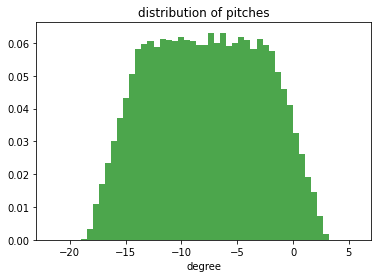

In [5]:
num_bins=50
fig1, ax = plt.subplots()
n, bins, patches = ax.hist(pitches, num_bins, 
                            density = 1, 
                            color ='g',
                            alpha = 0.7)
ax.set_title('distribution of pitches')
ax.set_xlabel('degree')
ax.set_xlim(-23, 7)

In [ ]:
num_bins=50
n, bins, patches = plt.hist(pitches, num_bins, 
                            density = 1, 
                            color ='g',
                            alpha = 0.7)
plt.title('distribution of pitches')
plt.xlabel('degree')
plt.xlim(-23, 7)

with wandb.init(project=project, name='sample_pitches_histogram') as run:
    run.log({"data3":wandb.Image(plt)})

In [ ]:
num_bins=50
n, bins, patches = plt.hist(yaws, num_bins, 
                            density = 1, 
                            color ='m',
                            alpha = 0.7)
plt.title('distribution of yaws')
plt.xlabel('degree')
plt.xlim(-25, 25)

with wandb.init(project=project, name='sample_yaws_histogram') as run:
    run.log({"data3":wandb.Image(plt)})

In [ ]:
plt.scatter(x=pitchesl, y=pitchesr)
plt.title('pitches of left and right eyes')
plt.xlabel('pitch: left eye (degree)')
plt.ylabel('pitch: right eye (degree)')
plt.grid(visible=True)
with wandb.init(project=project, name='sample_pitches_corr') as run:
    run.log({"data4":wandb.Image(plt)})

In [ ]:
plt.scatter(x=yawsl, y=yawsr)
plt.title('yaws of left and right eyes')
plt.xlabel('yaw: left eye (degree)')
plt.ylabel('yaw: right eye (degree)')
plt.grid(visible=True)

with wandb.init(project=project, name='sample_yaws_corr') as run:
    run.log({"data4":wandb.Image(plt)})

In [ ]:
adiffs = []
for yawl, yawr in zip(yawsl, yawsr):
    adiff = abs(yawl-yawr)
#     print(yawl, yawr, diff)
    adiffs.append(adiff)

In [ ]:
num_bins=1000
n, bins, patches = plt.hist(adiffs, num_bins, 
                            density = 1, 
                            color ='b',
                            alpha = 0.7)
plt.title('distribution of yaw absolute differences')
plt.xlabel('degree difference')
plt.xlim(3, 7)
with wandb.init(project=project, name='absolute diffs yaw right and left') as run:
    run.log({"data5":wandb.Image(plt)})

In [ ]:
diffs = []
for yawl, yawr in zip(yawsl, yawsr):
    diff = yawl-yawr
    if yawr > yawl:
        print(yawl, yawr, diff)
    diffs.append(diff)

In [ ]:
num_bins=1000
n, bins, patches = plt.hist(diffs, num_bins, 
                            density = 1, 
                            color ='g',
                            alpha = 0.7)
plt.title('distribution of yaw differences')
plt.xlabel('degree difference')
plt.xlim(3.0, 6)

with wandb.init(project=project, name='diffs yaw right and left') as run:
    run.log({"data5":wandb.Image(plt)})